In [40]:
import pandas as pd
import numpy as np
fd=pd.read_csv('creditcard.csv')
df=fd[:200000]
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,133235.0,-0.789228,1.471198,-1.291998,-0.686221,0.309355,-0.323149,0.062620,0.938297,-0.190176,...,0.428462,1.177949,-0.026305,0.215007,-0.704790,-0.226072,0.349801,0.246827,0.99,0
199996,133236.0,-0.083310,1.950405,0.556845,4.022670,0.503287,0.510877,2.464482,-1.327936,-0.570295,...,-0.072613,1.374763,-0.194896,0.072835,-1.159745,0.267147,0.283539,-0.587234,151.64,0
199997,133236.0,-1.943282,0.898549,-0.402690,-0.179340,0.301361,-0.134193,1.288226,-0.478686,0.308260,...,-0.341853,-0.157110,-0.050649,-0.425485,-0.590081,0.282905,-0.730029,-0.155896,108.21,0
199998,133236.0,-1.103962,0.940976,1.652220,-0.365992,-0.299453,0.489269,-0.106126,0.832525,0.349337,...,-0.357995,-0.842373,-0.254363,-0.512391,0.456296,-0.414252,0.202450,0.054214,1.00,0


In [41]:
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))


0.001928712772086266
Fraud Cases: 385
Valid Transactions: 199615


In [47]:
print("details of valid transaction")
valid.Amount.describe()
print("Amount details of the fraudulent transaction")
fraud.Amount.describe()

details of valid transaction
Amount details of the fraudulent transaction


count     385.000000
mean      121.808805
std       256.061414
min         0.000000
25%         1.000000
50%        12.310000
75%       104.810000
max      2125.870000
Name: Amount, dtype: float64

In [42]:
x = df.drop(['Class'], axis = 1)
y = df["Class"]
print(x.shape)
print(y.shape)
xData = x.values
yData = y.values

(200000, 30)
(200000,)


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
reg= RandomForestClassifier()
reg.fit(x_train,y_train)
y_predict=reg.predict(x_test)
#print(y_predict)
accuracy=accuracy_score(y_predict,y_test)
print(accuracy)

0.999575


In [50]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix
  
n_outliers = len(fraud)
n_errors = (y_predict != y_test).sum()
print("The model used is Random Forest classifier")
  
acc = accuracy_score(y_test, y_predict)
print("The accuracy is {}".format(acc))
  
prec = precision_score(y_test, y_predict)
print("The precision is {}".format(prec))
  
rec = recall_score(y_test, y_predict)
print("The recall is {}".format(rec))
  
f1 = f1_score(y_test, y_predict)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is 0.999575
The precision is 0.9661016949152542
The recall is 0.7916666666666666
The F1-Score is 0.8702290076335878


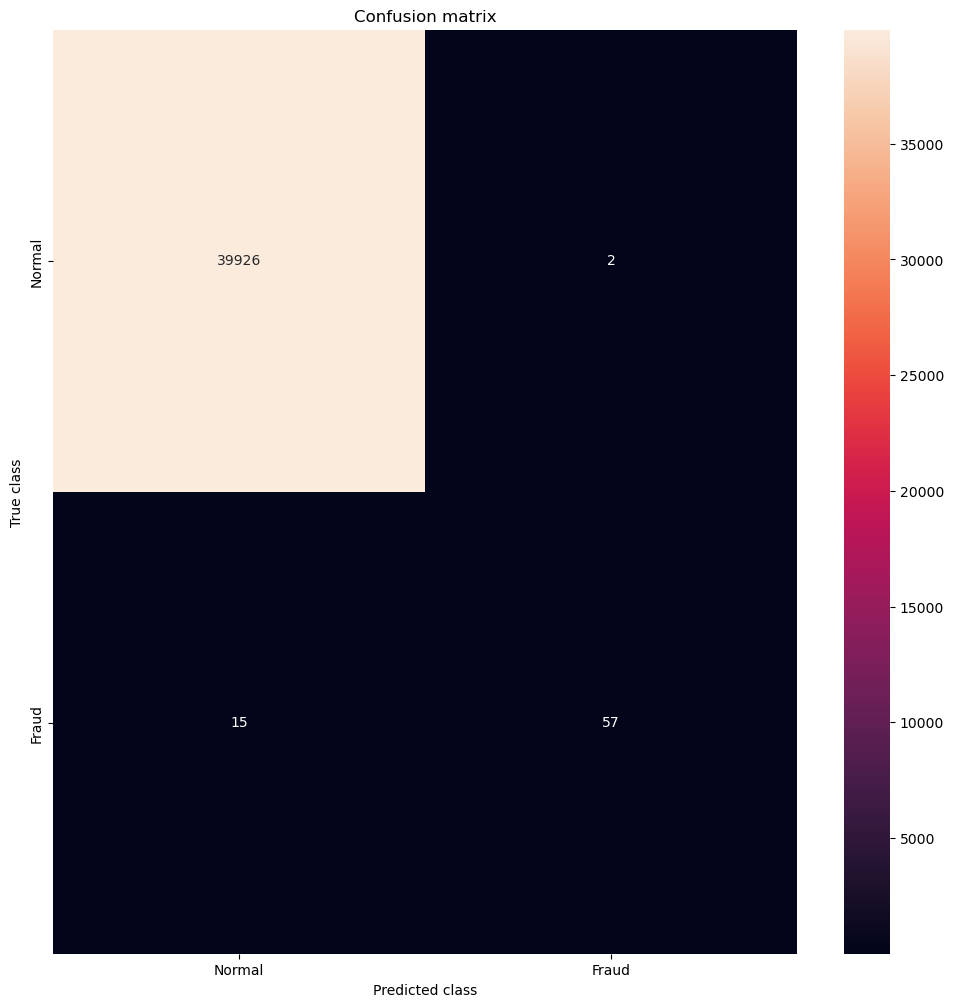

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(y_test,y_predict)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()